## Cloning MMDetection repo

Link to the project data and best models weights: [project data](https://drive.google.com/drive/folders/1l7PKQ5oxrz_zSA5_B9BauDG9Lzu7WFk_?usp=sharing).

In [7]:
path_to_project_dir = '/recognition_project' # enter path to "recognition_project" folder

In [8]:
import os

os.chdir(path_to_project_dir)

In [9]:
! git clone https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 29291, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 29291 (delta 105), reused 146 (delta 83), pack-reused 29074
Receiving objects: 100% (29291/29291), 39.70 MiB | 24.19 MiB/s, done.
Resolving deltas: 100% (20913/20913), done.


## Training model

Download pretrained weights for YOLOX:

In [10]:
! python download_weights.py --weights yolox_l_8x8_300e_coco

Founds weights: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_l_8x8_300e_coco/yolox_l_8x8_300e_coco_20211126_140236-d3bd2b23.pth

100% 217M/217M [00:17<00:00, 12.2MiB/s]


Start training:

In [11]:
! python train.py

Default Config:
optimizer = dict(
    type='SGD',
    lr=0.01,
    momentum=0.9,
    weight_decay=0.0005,
    nesterov=True,
    paramwise_cfg=dict(norm_decay_mult=0.0, bias_decay_mult=0.0))
optimizer_config = dict(grad_clip=None)
lr_config = dict(
    policy='YOLOX',
    warmup='exp',
    by_epoch=False,
    warmup_by_epoch=True,
    warmup_ratio=1,
    warmup_iters=5,
    num_last_epochs=15,
    min_lr_ratio=0.05)
runner = dict(type='EpochBasedRunner', max_epochs=300)
checkpoint_config = dict(interval=10)
log_config = dict(interval=50, hooks=[dict(type='TextLoggerHook')])
custom_hooks = [
    dict(type='YOLOXModeSwitchHook', num_last_epochs=15, priority=48),
    dict(type='SyncNormHook', num_last_epochs=15, interval=10, priority=48),
    dict(
        type='ExpMomentumEMAHook',
        resume_from=None,
        momentum=0.0001,
        priority=49)
]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
opencv_num_threads 

## Testing

Images inference (using best model checkpoint)

In [ ]:
! python inference.py

Test images predictions

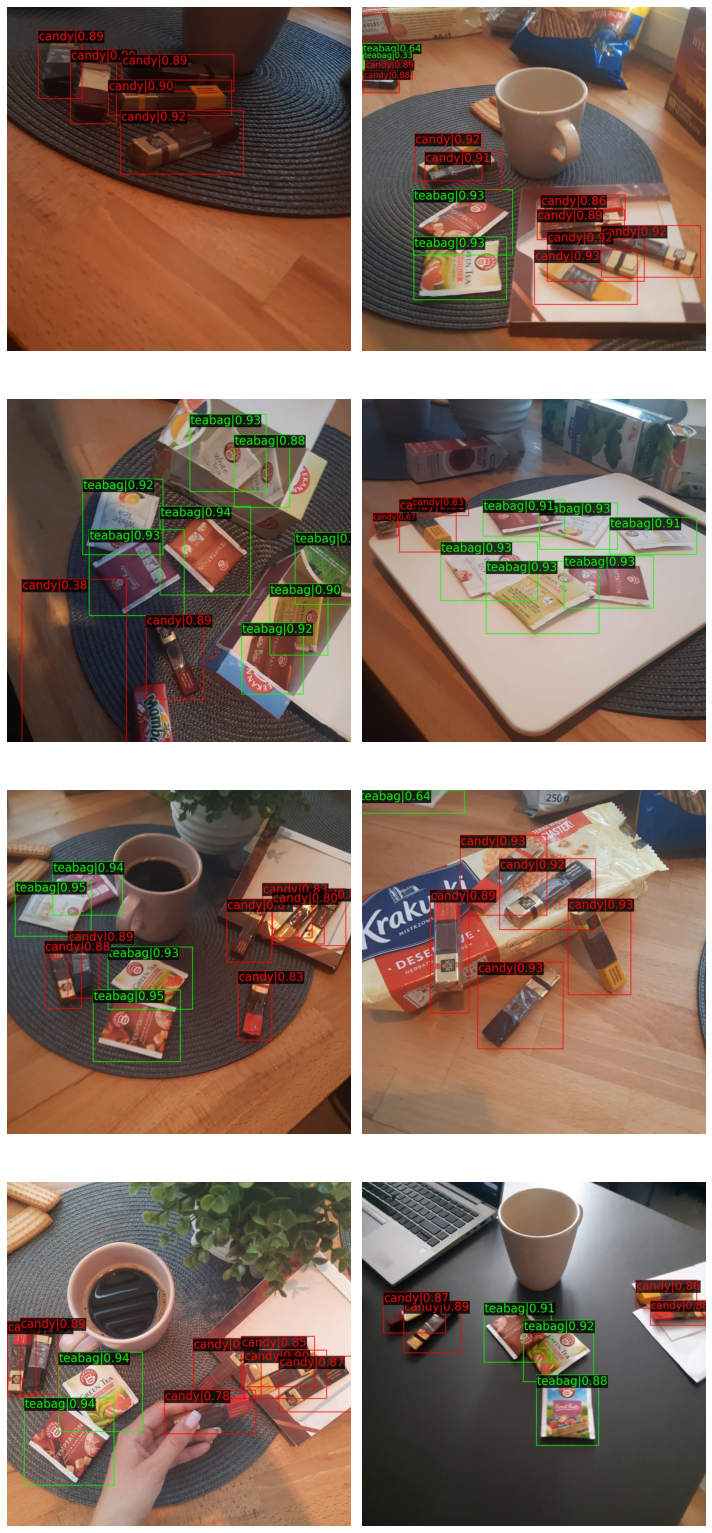

In [13]:
from visualize import show_test_results

show_test_results()